# Data Cleaning


- **Author**: Dan O'Connor
- **Notebook**: 1 of 9

## Project Description: Music Genre Identification

The goal of this project is to use acoustic features extracted from 30 second clips of songs to identify the musical genre. My approach is to first identify the acoustic features I will be using, then preprocess and prepare the data for various ML models. I will cast a wide net of different classifcation models, so I can compare various success metrics between them. 



All the data is originally from the Free Music Archieve (FMA): https://freemusicarchive.org/. 



The data was extracted by Michaël Defferrard, Kirell Benzi, Pierre Vandergheynst, and Xavier Bresson in a paper called 'FMA: A DATASET FOR MUSIC ANALYSIS': https://arxiv.org/pdf/1612.01840.pdf



Michaël Defferrard's GitHub (feature extraction): https://github.com/mdeff/fma







The purpose of this notebook is to load, inspect, and explain the original data and go through the process of cleaning it for EDA and modeling.

Import required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path
import ast

There are 3 data sets which contain the required information for this analysis, `genres.csv`, `tracks.csv`, and `features.csv`. The follow load function is from Michaël Defferrard (GitHub: https://github.com/mdeff/fma). I will showcase the original dataset first, then go through my process of cleaning and prepping for modeling.

The function below is necessary to load the multi-level headers (written by Defferrard) within the data files and properly organize in a dataframe.

In [2]:
def load(filepath):

    filename = os.path.basename(filepath)

    if 'features' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'echonest' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'genres' in filename:
        return pd.read_csv(filepath, index_col=0)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        try:
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                    'category', categories=SUBSETS, ordered=True)
        except (ValueError, TypeError):
            # the categories and ordered arguments were removed in pandas 0.25
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                     pd.CategoricalDtype(categories=SUBSETS, ordered=True))

        COLUMNS = [('track', 'genre_top'), ('track', 'license'),
                   ('album', 'type'), ('album', 'information'),
                   ('artist', 'bio')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks

In [3]:
pd.set_option('display.max_columns', None) # Shows all columns with horizontal scroll

In [4]:
tracks_df = load('Data/tracks.csv')

There is a multi-level header with lots of information I am not going to use for the sake of this analysis. The tracks dataset contains information scraped from the Free Music Archieve (FMA) and wikipedia, however, it is far from complete. In later analysis it would be interesting to try to use acoustic features and metadata to identify genres. The tracks data frame has about 100,000 rows and 50 columns

In [5]:
print(f'Rows: {tracks_df.shape[0]}\nCols: {tracks_df.shape[1]}') #print rows/col
tracks_df.head(2)


Rows: 106574
Cols: 52


album                                                          \
         comments        date_created date_released engineer favorites id   
track_id                                                                    
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   

                                                                         \
         information listens producer tags                 title tracks   
track_id                                                                  
2            <p></p>    6073      NaN   []  AWOL - A Way Of Life      7   
3            <p></p>    6073      NaN   []  AWOL - A Way Of Life      7   

                           artist                                    \
           type active_year_begin active_year_end associated_labels   
track_id                                                              
2         Album        2006-01-01             NaT               NaN   
3         Album        2006-01-01             NaT               NaN   

                                                                      \
                                                        bio comments   
track_id                                                               
2         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
3         <p>A Way Of Life, A Collective of Hip-Hop from...        0   

                                                                             \
                date_created favorites id   latitude    location  longitude   
track_id                                                                      
2        2008-11-26 01:42:32         9  1  40.058324  New Jersey -74.405661   
3        2008-11-26 01:42:32         9  1  40.058324  New Jersey -74.405661   

                                                                   \
                                                    members  name   
track_id                                                            
2         Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...  AWOL   
3         Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...  AWOL   

                                                                     \
                                           related_projects    tags   
track_id                                                              
2         The list of past projects is 2 long but every1...  [awol]   
3         The list of past projects is 2 long but every1...  [awol]   

                                                                       set  \
                                          website wikipedia_page     split   
track_id                                                                     
2         http://www.AzillionRecords.blogspot.com            NaN  training   
3         http://www.AzillionRecords.blogspot.com            NaN  training   

                    track                                                      \
          subset bit_rate comments composer        date_created date_recorded   
track_id                                                                        
2          small   256000        0      NaN 2008-11-26 01:48:12    2008-11-26   
3         medium   256000        0      NaN 2008-11-26 01:48:14    2008-11-26   

                                                                              \
         duration favorites genre_top genres genres_all information interest   
track_id                                                                       
2             168         2   Hip-Hop   [21]       [21]         NaN     4656   
3             237         1   Hip-Hop   [21]       [21]         NaN     1470   

                                                                           \
         language_code                                            license   
track_id                                                                    
2     

There is lots of potentially useful and interesting information in this dataset, however, a vast majority of it is missing. I will just be using acoustic features for this project. Below it is shown that certain columns are missing data for almost all the tracks.

In [6]:
tracks_df.isna().sum().sort_values(ascending=False) #sum of nulls

track   lyricist             106263
        publisher            105311
        information          104225
        composer             102904
artist  active_year_end      101199
        wikipedia_page       100993
track   date_recorded        100415
artist  related_projects      93422
        associated_labels     92303
track   language_code         91550
album   engineer              91279
        producer              88514
artist  active_year_begin     83863
        latitude              62030
        longitude             62030
        members               59725
track   genre_top             56976
artist  location              36364
album   date_released         36280
artist  bio                   35418
        website               27318
album   information           23425
        type                   6508
        date_created           3529
        title                  1025
artist  date_created            856
track   license                  87
        title               

The genres dataframe is shown below.

In [7]:
genres_df = load('Data/genres.csv')

In [8]:
print(f'Rows: {genres_df.shape[0]}\nCols: {genres_df.shape[1]}') #rows/cols
genres_df.head()

Rows: 163
Cols: 4


,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5


Below shows the genre hierarchy. The genres closest to the center are the parent genres, or main genres.

In [15]:
import plotly.graph_objs as go

# Define the hierarchy based on genres_df. When parents == 0, it is a main genre
fig = go.Figure(go.Sunburst(
    ids=genres_df.index,
    labels=genres_df["title"],
    parents=genres_df["parent"],
))

# Set the layout
fig.update_layout(
    title="Genre Hierarchy",
    margin=dict(t=30, l=0, r=0, b=0), # setting margins so visualization shows up larger
    height=1200,
    width=1200
)
plt.savefig('Images/Genre_hierachy.png')
fig.show()

<Figure size 640x480 with 0 Axes>

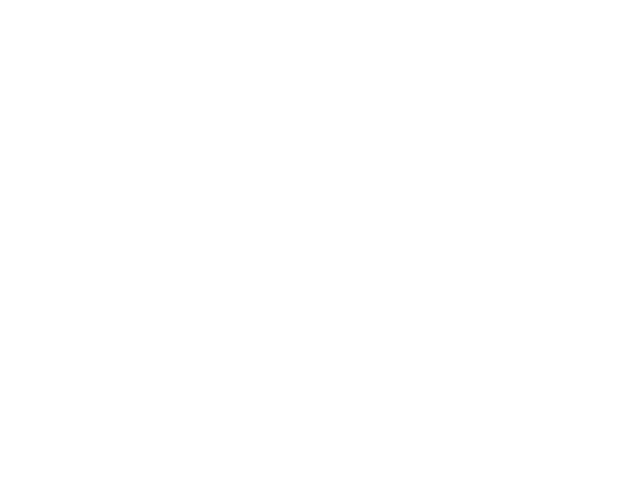

In [16]:
from IPython.display import Image
Image(filename='Images/Genre_hierachy.png')

Below is the original features dataframe. It comes in a four level header, with the feature, the statistic being calculated, and the number , as well as the track id. There are 518 columns, and 106,000 rows. Each row represents a different song. Below is a brief overview of the features. For each feature 7 statistical measures are calculated on each. See notebook 2 for further details about the features.

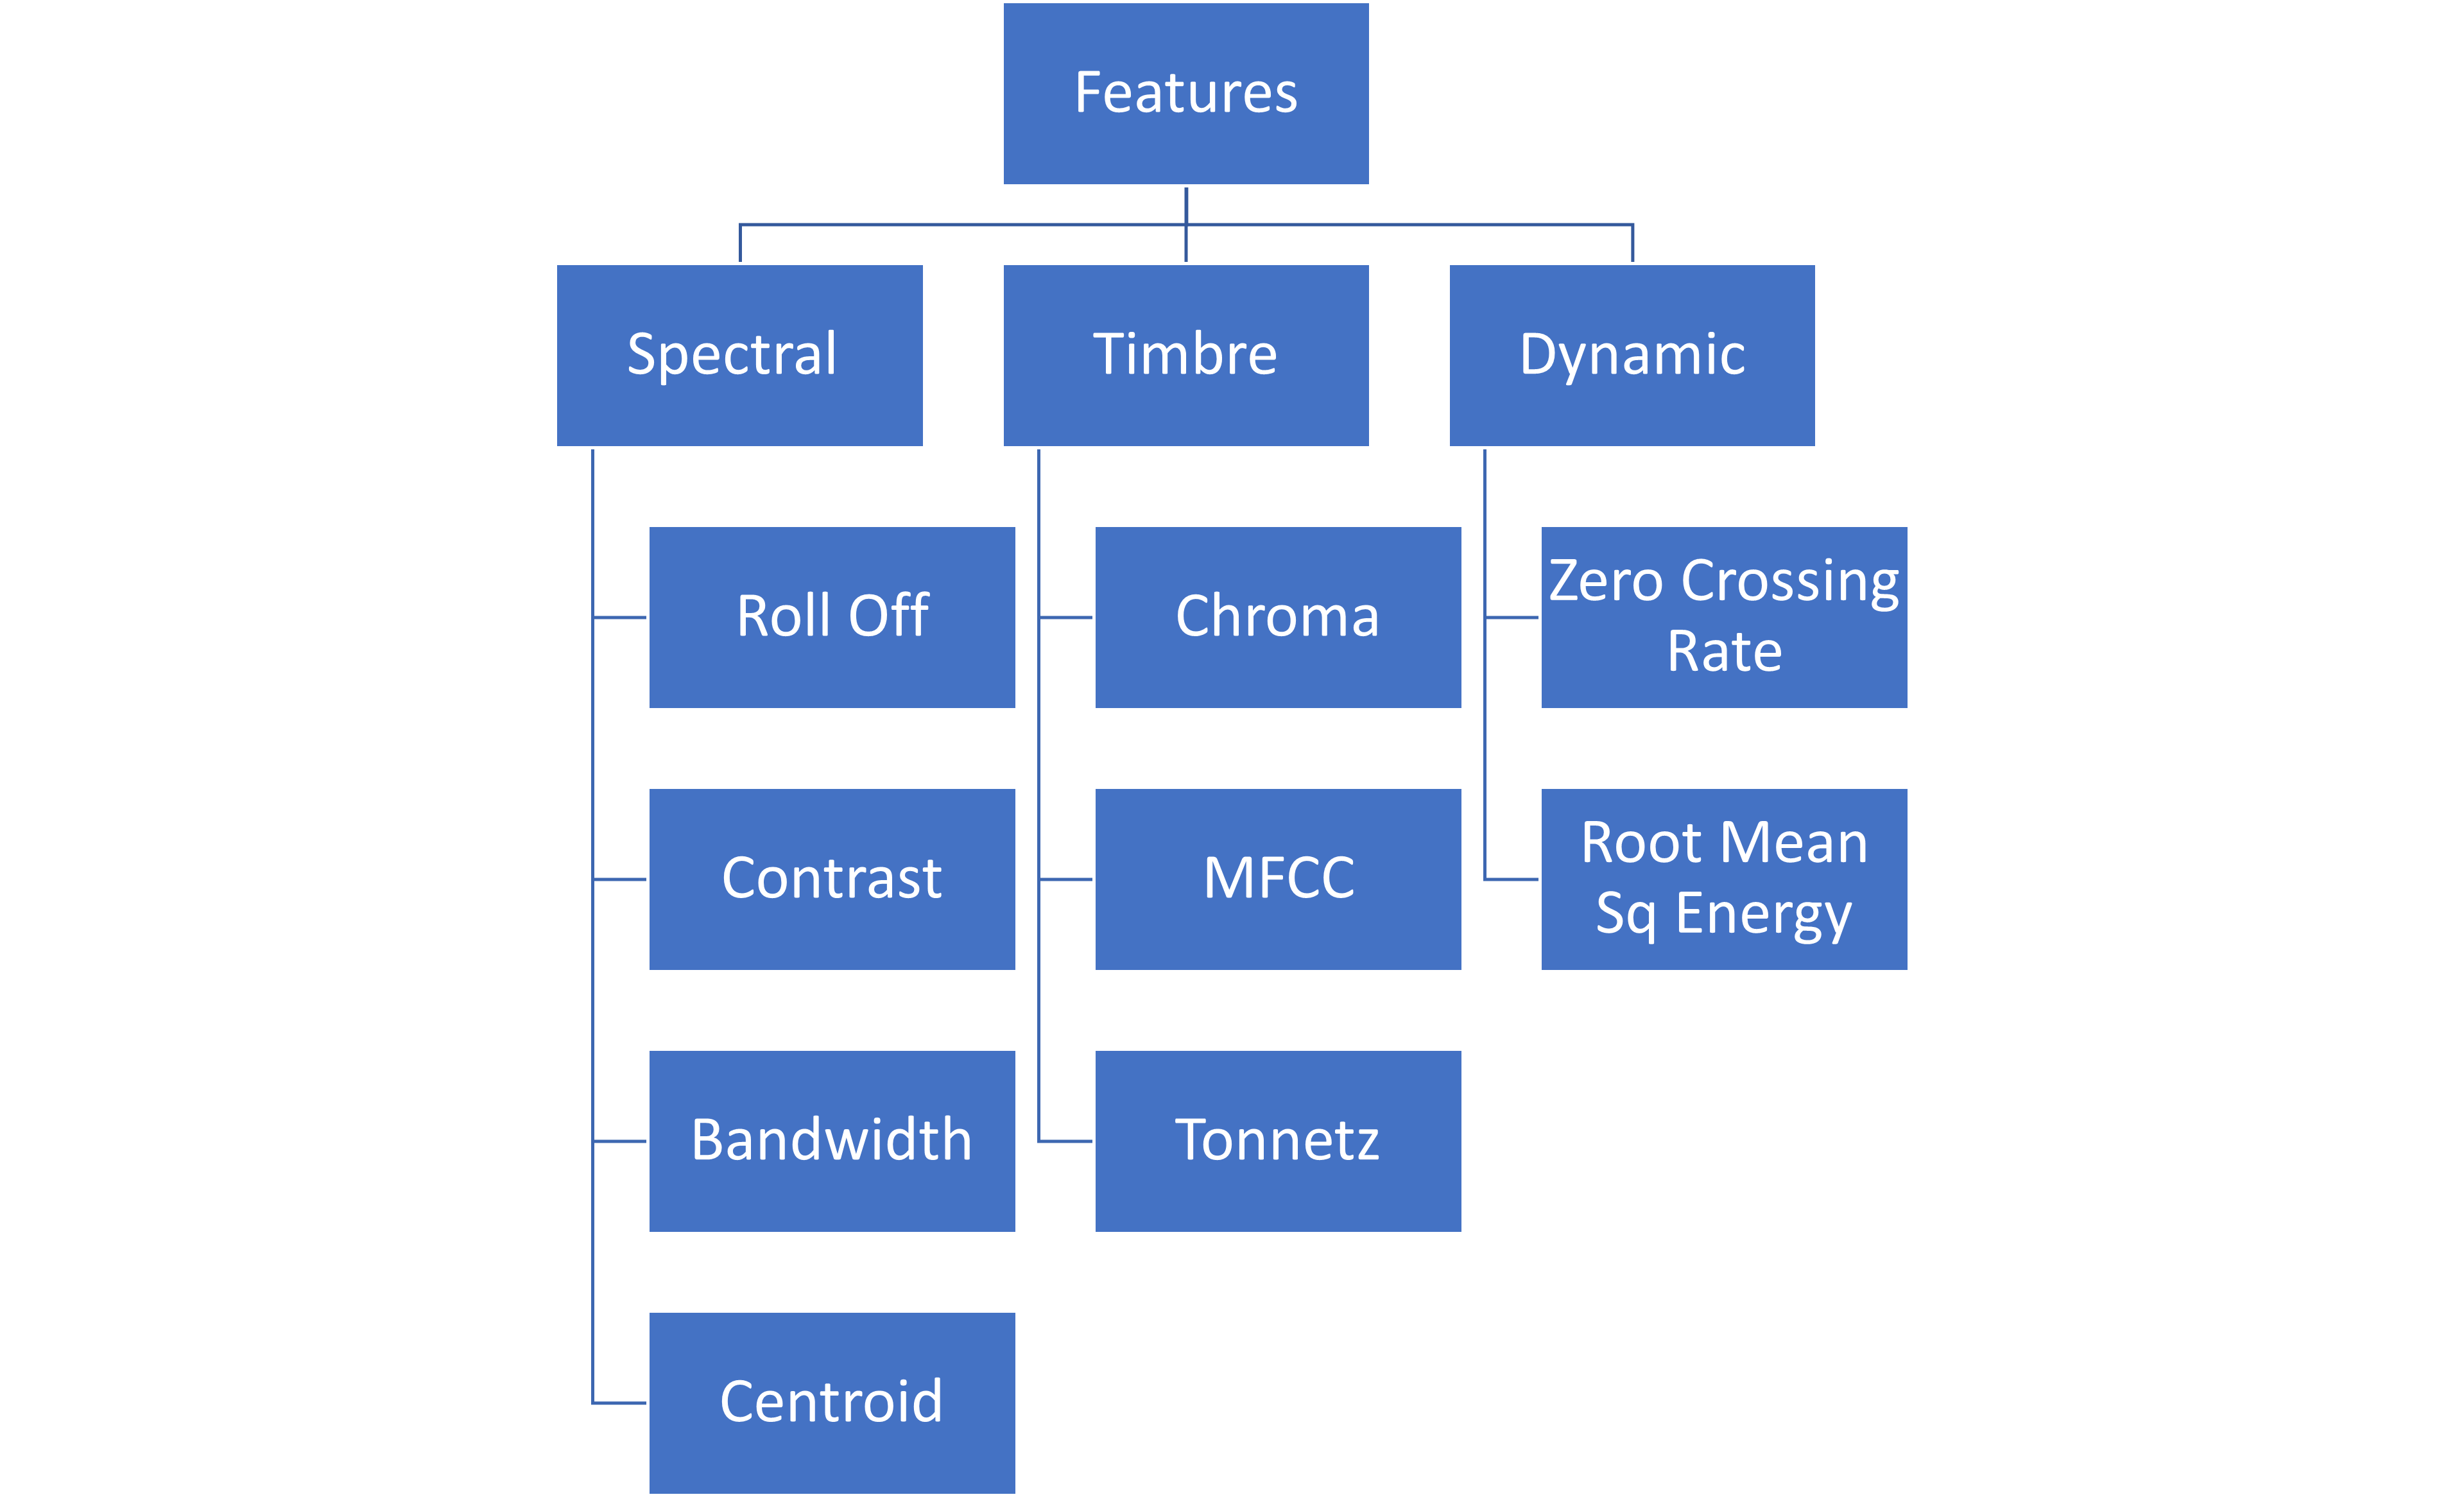

In [17]:

Image(filename='Images/Feature tree.png')

In [18]:
features_df=load("Data/features.csv")

In [19]:
print(f'Rows: {features_df.shape[0]}\nCols: {features_df.shape[1]}') #rols/cols
features_df.head(2)

Rows: 106574
Cols: 518


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           1.481593  2.691455  0.866868  1.341231  1.347792  1.237658   
3           1.366848  1.054094  0.108103  0.619185  1.038253  1.292235   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.692500  0.569344  0.597041  0.625864  0.567330  0.443949   
3           0.677641  0.584248  0.581271  0.581182  0.454241  0.464841   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.487976  0.497327  0.574435  0.579241  0.620102  0.586945   
3           0.542833  0.664720  0.511329  0.530998  0.603398  0.547428   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.474300  0.369816  0.236119  0.228068  0.222830  0.221415   
3           0.232784  0.229469  0.225674  0.216713  0.220512  0.242744   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.229238  0.248795  0.196245  0.175809  0.200713  0.319972   
3           0.369235  0.420716  0.312129  0.242748  0.264292  0.225683   

feature                                                                \
statistics    median                                                    
number            01        02        03        04        05       06   
track_id                                                                
2           0.482825  0.387652  0.249082  0.238187  0.233066  0.23012   
3           0.230579  0.228059  0.209370  0.202267  0.230913  0.26030   

feature                                                                     \
statistics                                                             min   
number            07        08        09        10       11        12   01   
track_id                                                                     
2           0.232068  0.248896  0.197692  0.173300  0.19884  0.314053  0.0   
3           0.393017  0.441179  0.313540  0.239462  0.25667  0.225647  0.0   

feature                                                                      \
statistics                                                             skew   
number       02   03   04   05   06   07   08   09   10   11   12        01   
track_id                                                                      
2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -1.995901   
3           0.0

For the feautres data I have edited it myself outside of python in Microsft excel and made the multi-header to single column titles. It was much easier and quicker to query and work with.

In [20]:
features_df_sh = pd.read_csv('Data/features_single_header.csv', index_col='track_id') #single header csv

It has the same number of columns with 3 less 'rows' becasue I compressed the 4-level header to a single level header.

In [21]:
features_df_sh.shape 

(106577, 518)

See below the new titling of each column.

In [22]:
features_df_sh.head(2)

,chroma_cens_kurtosis_1,chroma_cens_kurtosis_2,chroma_cens_kurtosis_3,chroma_cens_kurtosis_4,chroma_cens_kurtosis_5,chroma_cens_kurtosis_6,chroma_cens_kurtosis_7,chroma_cens_kurtosis_8,chroma_cens_kurtosis_9,chroma_cens_kurtosis_10,chroma_cens_kurtosis_11,chroma_cens_kurtosis_12,chroma_cens_max_1,chroma_cens_max_2,chroma_cens_max_3,chroma_cens_max_4,chroma_cens_max_5,chroma_cens_max_6,chroma_cens_max_7,chroma_cens_max_8,chroma_cens_max_9,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_mean_1,chroma_cens_mean_2,chroma_cens_mean_3,chroma_cens_mean_4,chroma_cens_mean_5,chroma_cens_mean_6,chroma_cens_mean_7,chroma_cens_mean_8,chroma_cens_mean_9,chroma_cens_mean_10,chroma_cens_mean_11,chroma_cens_mean_12,chroma_cens_median_1,chroma_cens_median_2,chroma_cens_median_3,chroma_cens_median_4,chroma_cens_median_5,chroma_cens_median_6,chroma_cens_median_7,chroma_cens_median_8,chroma_cens_median_9,chroma_cens_median_10,chroma_cens_median_11,chroma_cens_median_12,chroma_cens_min_1,chroma_cens_min_2,chroma_cens_min_3,chroma_cens_min_4,chroma_cens_min_5,chroma_cens_min_6,chroma_cens_min_7,chroma_cens_min_8,chroma_cens_min_9,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cens_skew_1,chroma_cens_skew_2,chroma_cens_skew_3,chroma_cens_skew_4,chroma_cens_skew_5,chroma_cens_skew_6,chroma_cens_skew_7,chroma_cens_skew_8,chroma_cens_skew_9,chroma_cens_skew_10,chroma_cens_skew_11,chroma_cens_skew_12,chroma_cens_std_1,chroma_cens_std_2,chroma_cens_std_3,chroma_cens_std_4,chroma_cens_std_5,chroma_cens_std_6,chroma_cens_std_7,chroma_cens_std_8,chroma_cens_std_9,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cqt_kurtosis_1,chroma_cqt_kurtosis_2,chroma_cqt_kurtosis_3,chroma_cqt_kurtosis_4,chroma_cqt_kurtosis_5,chroma_cqt_kurtosis_6,chroma_cqt_kurtosis_7,chroma_cqt_kurtosis_8,chroma_cqt_kurtosis_9,chroma_cqt_kurtosis_10,chroma_cqt_kurtosis_11,chroma_cqt_kurtosis_12,chroma_cqt_max_1,chroma_cqt_max_2,chroma_cqt_max_3,chroma_cqt_max_4,chroma_cqt_max_5,chroma_cqt_max_6,chroma_cqt_max_7,chroma_cqt_max_8,chroma_cqt_max_9,chroma_cqt_max_10,chroma_cqt_max_11,chroma_cqt_max_12,chroma_cqt_mean_1,chroma_cqt_mean_2,chroma_cqt_mean_3,chroma_cqt_mean_4,chroma_cqt_mean_5,chroma_cqt_mean_6,chroma_cqt_mean_7,chroma_cqt_mean_8,chroma_cqt_mean_9,chroma_cqt_mean_10,chroma_cqt_mean_11,chroma_cqt_mean_12,chroma_cqt_median_1,chroma_cqt_median_2,chroma_cqt_median_3,chroma_cqt_median_4,chroma_cqt_median_5,chroma_cqt_median_6,chroma_cqt_median_7,chroma_cqt_median_8,chroma_cqt_median_9,chroma_cqt_median_10,chroma_cqt_median_11,chroma_cqt_median_12,chroma_cqt_min_1,chroma_cqt_min_2,chroma_cqt_min_3,chroma_cqt_min_4,chroma_cqt_min_5,chroma_cqt_min_6,chroma_cqt_min_7,chroma_cqt_min_8,chroma_cqt_min_9,chroma_cqt_min_10,chroma_cqt_min_11,chroma_cqt_min_12,chroma_cqt_skew_1,chroma_cqt_skew_2,chroma_cqt_skew_3,chroma_cqt_skew_4,chroma_cqt_skew_5,chroma_cqt_skew_6,chroma_cqt_skew_7,chroma_cqt_skew_8,chroma_cqt_skew_9,chroma_cqt_skew_10,chroma_cqt_skew_11,chroma_cqt_skew_12,chroma_cqt_std_1,chroma_cqt_std_2,chroma_cqt_std_3,chroma_cqt_std_4,chroma_cqt_std_5,chroma_cqt_std_6,chroma_cqt_std_7,chroma_cqt_std_8,chroma_cqt_std_9,chroma_cqt_std_10,chroma_cqt_std_11,chroma_cqt_std_12,chroma_stft_kurtosis_1,chroma_stft_kurtosis_2,chroma_stft_kurtosis_3,chroma_stft_kurtosis_4,chroma_stft_kurtosis_5,chroma_stft_kurtosis_6,chroma_stft_kurtosis_7,chroma_stft_kurtosis_8,chroma_stft_kurtosis_9,chroma_stft_kurtosis_10,chroma_stft_kurtosis_11,chroma_stft_kurtosis_12,chroma_stft_max_1,chroma_stft_max_2,chroma_stft_max_3,chroma_stft_max_4,chroma_stft_max_5,chroma_stft_max_6,chroma_stft_max_7,chroma_stft_max_8,chroma_stft_max_9,chroma_stft_max_10,chroma_stft_max_11,chroma_stft_max_12,chroma_stft_mean_1,chroma_stft_mean_2,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,chroma_stft_mean_7,chroma_stft_mean_8,chroma_stft_mean_9,chroma_stft_mean_10,chroma_stft_mean_11,chroma_stft_mean_12,chroma_stft_median_1,chroma_stft_median_2,chroma

From the tracks, I only need several columns because I will be predicting genre purely based on acoustic features, not metadata. The features I am using are the top genre and all the genres. The top genre says the main parent genre for the track, and the `genres_all` shows all the subgenres within each track.

In [23]:
tracks_df_new = tracks_df[[('track','genre_top'),('track','genres_all')]] #filter only what I will use

In [24]:
tracks_df_new.head(2)

track           
         genre_top genres_all
track_id                     
2          Hip-Hop       [21]
3          Hip-Hop       [21]

Got rid of the multi level header for the tracks column.

In [25]:
tracks_df_new.columns = tracks_df_new.columns.droplevel(0) #drop to single header
tracks_df_sh = tracks_df_new.rename(columns={'index':'track_id'}) #rename index

In [26]:
tracks_df_sh.head(2)

,genre_top,genres_all
track_id,,
2,Hip-Hop,[21]
3,Hip-Hop,[21]


There are 56976 songs without a top genre.

In [27]:

tracks_df_sh['genre_top'].isna().sum() #null top genres

56976

`genres_all` lists all the genres and subgenres each song belongs to. I will loop through genres_all and assign a top genre if there is only 1.

First I need to locate the top genres, which do not have a parent genre (or a parent genre of 0). This information is accessed through the `genres_df`

In [28]:
genres_df.head()

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5


In [29]:
parent_genres = genres_df.loc[genres_df['parent'] == 0, 'top_level'].tolist() #where parent = 0 is top genre
parent_genres

[2, 3, 4, 5, 8, 9, 10, 12, 13, 14, 15, 17, 20, 21, 38, 1235]

In [30]:
tracks_df_sh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   genre_top   49598 non-null   category
 1   genres_all  106574 non-null  object  
dtypes: category(1), object(1)
memory usage: 1.7+ MB


Here is the function that loops through the genres_all and if there is only 1 within the parent genres will assign it as the top genre.

In [31]:
def get_top_genre(genres_all): 
    fill_genre = 0 #start at 0
    counter = 0 #start at  0
    for genre in genres_all:  #loop  thru list in df ['genres_all']
        if genre in parent_genres: #if genre is in parent genre add 1 to counter
            fill_genre = genre
            counter += 1
    if counter == 1:    # if and only if counter is 1, fill  top genre. Else return 0
        return fill_genre
    else:
        return 0




In [32]:
tracks_df_sh['top_genre_updated'] = tracks_df_sh['genres_all'].apply(get_top_genre).astype(int) #int

In [33]:
tracks_df_sh.head()


,genre_top,genres_all,top_genre_updated
track_id,,,
2,Hip-Hop,[21],21
3,Hip-Hop,[21],21
5,Hip-Hop,[21],21
10,Pop,[10],10
20,NaN,"[17, 10, 76, 103]",0


I created a dictionary to map the parent genre number to the genre name and mapped it to the new top genre number

In [34]:
# Create a dictionary 
parent_genres_names = {2: 'International', 3: 'Blues', 4: 'Jazz', 5: 'Classical', 8: 'Old-Time / Historic', 
                       9: 'Country', 10: 'Pop', 12: 'Rock', 13: 'Easy Listening', 14: 'Soul-RnB', 15: 'Electronic',
                       17: 'Folk', 20: 'Spoken', 21: 'Hip-Hop', 38: 'Experimental', 1235: 'Instrumental'}

# map int values with str
tracks_df_sh['top_genre_updated'] = tracks_df_sh['top_genre_updated'].map(parent_genres_names)

It appears that no new information was gathered from this endeavor.

In [35]:
tracks_df_sh.head()

,genre_top,genres_all,top_genre_updated
track_id,,,
2,Hip-Hop,[21],Hip-Hop
3,Hip-Hop,[21],Hip-Hop
5,Hip-Hop,[21],Hip-Hop
10,Pop,[10],Pop
20,NaN,"[17, 10, 76, 103]",NaN


Below it is shown that this step was already taken in the original data, therefore I will drop my newly created column.

In [36]:
tracks_df_sh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   genre_top          49598 non-null   category
 1   genres_all         106574 non-null  object  
 2   top_genre_updated  49598 non-null   object  
dtypes: category(1), object(2)
memory usage: 2.5+ MB


In [37]:
tracks_top_genre = tracks_df_sh.dropna().copy()

In [38]:
tracks_top_genre.drop(columns=['top_genre_updated','genres_all'],inplace=True) #no longer need

All that is needed is the top genre now.

In [39]:
tracks_top_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49598 entries, 2 to 155319
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   genre_top  49598 non-null  category
dtypes: category(1)
memory usage: 436.6 KB


Now to merge the model df with the features df to create my modeling df. Note that the number of samples halved.

In [40]:
model_df = tracks_top_genre.merge(features_df_sh, on='track_id') #merge dfs

In [41]:
model_df.shape #100k to about 50k

(49600, 519)

In [42]:
model_df.head(2)

,genre_top,chroma_cens_kurtosis_1,chroma_cens_kurtosis_2,chroma_cens_kurtosis_3,chroma_cens_kurtosis_4,chroma_cens_kurtosis_5,chroma_cens_kurtosis_6,chroma_cens_kurtosis_7,chroma_cens_kurtosis_8,chroma_cens_kurtosis_9,chroma_cens_kurtosis_10,chroma_cens_kurtosis_11,chroma_cens_kurtosis_12,chroma_cens_max_1,chroma_cens_max_2,chroma_cens_max_3,chroma_cens_max_4,chroma_cens_max_5,chroma_cens_max_6,chroma_cens_max_7,chroma_cens_max_8,chroma_cens_max_9,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_mean_1,chroma_cens_mean_2,chroma_cens_mean_3,chroma_cens_mean_4,chroma_cens_mean_5,chroma_cens_mean_6,chroma_cens_mean_7,chroma_cens_mean_8,chroma_cens_mean_9,chroma_cens_mean_10,chroma_cens_mean_11,chroma_cens_mean_12,chroma_cens_median_1,chroma_cens_median_2,chroma_cens_median_3,chroma_cens_median_4,chroma_cens_median_5,chroma_cens_median_6,chroma_cens_median_7,chroma_cens_median_8,chroma_cens_median_9,chroma_cens_median_10,chroma_cens_median_11,chroma_cens_median_12,chroma_cens_min_1,chroma_cens_min_2,chroma_cens_min_3,chroma_cens_min_4,chroma_cens_min_5,chroma_cens_min_6,chroma_cens_min_7,chroma_cens_min_8,chroma_cens_min_9,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cens_skew_1,chroma_cens_skew_2,chroma_cens_skew_3,chroma_cens_skew_4,chroma_cens_skew_5,chroma_cens_skew_6,chroma_cens_skew_7,chroma_cens_skew_8,chroma_cens_skew_9,chroma_cens_skew_10,chroma_cens_skew_11,chroma_cens_skew_12,chroma_cens_std_1,chroma_cens_std_2,chroma_cens_std_3,chroma_cens_std_4,chroma_cens_std_5,chroma_cens_std_6,chroma_cens_std_7,chroma_cens_std_8,chroma_cens_std_9,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cqt_kurtosis_1,chroma_cqt_kurtosis_2,chroma_cqt_kurtosis_3,chroma_cqt_kurtosis_4,chroma_cqt_kurtosis_5,chroma_cqt_kurtosis_6,chroma_cqt_kurtosis_7,chroma_cqt_kurtosis_8,chroma_cqt_kurtosis_9,chroma_cqt_kurtosis_10,chroma_cqt_kurtosis_11,chroma_cqt_kurtosis_12,chroma_cqt_max_1,chroma_cqt_max_2,chroma_cqt_max_3,chroma_cqt_max_4,chroma_cqt_max_5,chroma_cqt_max_6,chroma_cqt_max_7,chroma_cqt_max_8,chroma_cqt_max_9,chroma_cqt_max_10,chroma_cqt_max_11,chroma_cqt_max_12,chroma_cqt_mean_1,chroma_cqt_mean_2,chroma_cqt_mean_3,chroma_cqt_mean_4,chroma_cqt_mean_5,chroma_cqt_mean_6,chroma_cqt_mean_7,chroma_cqt_mean_8,chroma_cqt_mean_9,chroma_cqt_mean_10,chroma_cqt_mean_11,chroma_cqt_mean_12,chroma_cqt_median_1,chroma_cqt_median_2,chroma_cqt_median_3,chroma_cqt_median_4,chroma_cqt_median_5,chroma_cqt_median_6,chroma_cqt_median_7,chroma_cqt_median_8,chroma_cqt_median_9,chroma_cqt_median_10,chroma_cqt_median_11,chroma_cqt_median_12,chroma_cqt_min_1,chroma_cqt_min_2,chroma_cqt_min_3,chroma_cqt_min_4,chroma_cqt_min_5,chroma_cqt_min_6,chroma_cqt_min_7,chroma_cqt_min_8,chroma_cqt_min_9,chroma_cqt_min_10,chroma_cqt_min_11,chroma_cqt_min_12,chroma_cqt_skew_1,chroma_cqt_skew_2,chroma_cqt_skew_3,chroma_cqt_skew_4,chroma_cqt_skew_5,chroma_cqt_skew_6,chroma_cqt_skew_7,chroma_cqt_skew_8,chroma_cqt_skew_9,chroma_cqt_skew_10,chroma_cqt_skew_11,chroma_cqt_skew_12,chroma_cqt_std_1,chroma_cqt_std_2,chroma_cqt_std_3,chroma_cqt_std_4,chroma_cqt_std_5,chroma_cqt_std_6,chroma_cqt_std_7,chroma_cqt_std_8,chroma_cqt_std_9,chroma_cqt_std_10,chroma_cqt_std_11,chroma_cqt_std_12,chroma_stft_kurtosis_1,chroma_stft_kurtosis_2,chroma_stft_kurtosis_3,chroma_stft_kurtosis_4,chroma_stft_kurtosis_5,chroma_stft_kurtosis_6,chroma_stft_kurtosis_7,chroma_stft_kurtosis_8,chroma_stft_kurtosis_9,chroma_stft_kurtosis_10,chroma_stft_kurtosis_11,chroma_stft_kurtosis_12,chroma_stft_max_1,chroma_stft_max_2,chroma_stft_max_3,chroma_stft_max_4,chroma_stft_max_5,chroma_stft_max_6,chroma_stft_max_7,chroma_stft_max_8,chroma_stft_max_9,chroma_stft_max_10,chroma_stft_max_11,chroma_stft_max_12,chroma_stft_mean_1,chroma_stft_mean_2,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,chroma_stft_mean_7,chroma_stft_mean_8,chroma_stft_mean_9,chroma_stft_mean_10,chroma_stft_mean_11,chroma_stft_mean_12,chroma_stft_median_1,chroma_stft_media

In [43]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49600 entries, 2 to 155319
Columns: 519 entries, genre_top to zcr_std_1
dtypes: category(1), float64(518)
memory usage: 196.4 MB


The graphic below shows the number of songs per genre. I have chosen to filter this (shown by the red line) at 1000 song minimum per genre. I chose this number somewhat arbitrarily but it allows for easier classifcation if the genres included are more represented.

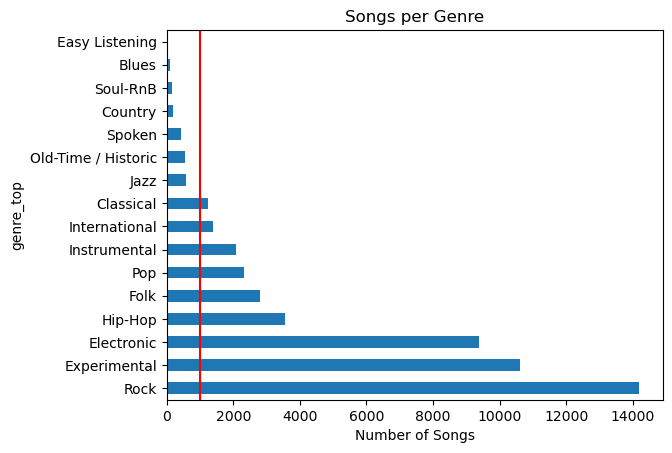

In [44]:

#plot songs per genre
model_df.value_counts('genre_top').sort_values(ascending=False).plot(kind='barh')
plt.axvline(1000, color='red')
plt.title('Songs per Genre')
plt.xlabel('Number of Songs')
plt.show()

Going to drop categories below 1000 songs.

In [45]:
counts = model_df['genre_top'].value_counts() #get counts
mask = model_df['genre_top'].isin(counts[counts >= 1000].index) #create mask
filtered_model_df = model_df[mask] #apply mask
filtered_model_df['genre_top'] = filtered_model_df['genre_top'].cat.remove_unused_categories() #remove filtered out categories

C:\Users\oconn\AppData\Local\Temp\ipykernel_7864\3473605305.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



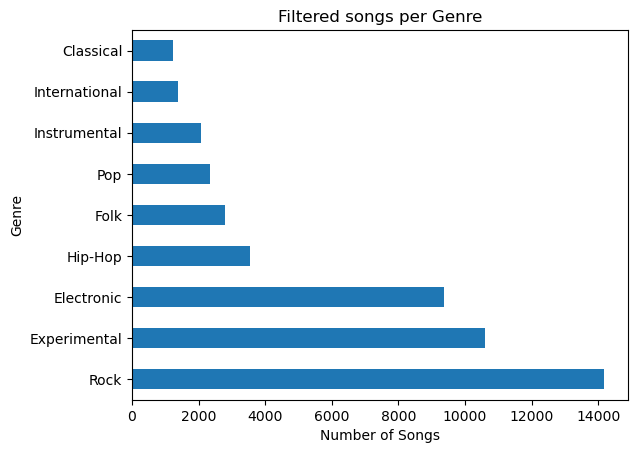

In [46]:
# filtered songss/genre
filtered_model_df['genre_top'].value_counts().plot(kind='barh')
plt.title('Filtered songs per Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

Finally, I am saving this filtered dataframe to use in further analysis. It is filtered to only the data I will be using.

In [ ]:
filtered_model_df.to_csv('Data/filtered_model_df.csv', index=False)